# **1. Install and Import Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# **2. Load and Explore Dataset**

In [ ]:
# Load the dataset
file_path = "/content/Customer Purchasing Behaviors.csv"
df = pd.read_csv(file_path)

In [ ]:
# Display first few rows
print(df)

     user_id  age  annual_income  purchase_amount  loyalty_score region  \
0          1   25          45000              200            4.5  North   
1          2   34          55000              350            7.0  South   
2          3   45          65000              500            8.0   West   
3          4   22          30000              150            3.0   East   
4          5   29          47000              220            4.8  North   
..       ...  ...            ...              ...            ...    ...   
233      234   40          60000              450            7.2   West   
234      235   38          59000              430            6.9  North   
235      236   54          74000              630            9.4  South   
236      237   32          52000              360            5.8   West   
237      238   31          51000              340            5.6  North   

     purchase_frequency  
0                    12  
1                    18  
2                    

In [ ]:
# Check for missing values
print(df.isnull().sum())

user_id               0
age                   0
annual_income         0
purchase_amount       0
loyalty_score         0
region                0
purchase_frequency    0
dtype: int64


In [ ]:
# Get dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             238 non-null    int64  
 1   age                 238 non-null    int64  
 2   annual_income       238 non-null    int64  
 3   purchase_amount     238 non-null    int64  
 4   loyalty_score       238 non-null    float64
 5   region              238 non-null    object 
 6   purchase_frequency  238 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 13.1+ KB
None


In [ ]:
# Summary statistics
print(df.describe())

          user_id         age  annual_income  purchase_amount  loyalty_score  \
count  238.000000  238.000000     238.000000       238.000000     238.000000   
mean   119.500000   38.676471   57407.563025       425.630252       6.794118   
std     68.848868    9.351118   11403.875717       140.052062       1.899047   
min      1.000000   22.000000   30000.000000       150.000000       3.000000   
25%     60.250000   31.000000   50000.000000       320.000000       5.500000   
50%    119.500000   39.000000   59000.000000       440.000000       7.000000   
75%    178.750000   46.750000   66750.000000       527.500000       8.275000   
max    238.000000   55.000000   75000.000000       640.000000       9.500000   

       purchase_frequency  
count          238.000000  
mean            19.798319  
std              4.562884  
min             10.000000  
25%             17.000000  
50%             20.000000  
75%             23.000000  
max             28.000000  


In [ ]:
df["purchase"] = df['loyalty_score'].apply(lambda x: 1 if x >= 7 else 0)
df["purchase"].value_counts()

,count
purchase,
1,122
0,116


# **3. Data Preprocessing**

In [ ]:
# Drop unnecessary columns (if any)
df.drop(columns=['user_id'], inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
df['region'] = label_encoder.fit_transform(df['region'])

# Normalize numerical features
scaler = StandardScaler()
df[['age', 'annual_income', 'purchase_amount', 'purchase_frequency']] = scaler.fit_transform(
    df[['age', 'annual_income', 'purchase_amount', 'purchase_frequency']]
)

# Define target variable (purchase prediction based on loyality score)
df['purchase'] = df['loyalty_score'].apply(lambda x: 1 if x >= 7 else 0)

# Drop Satisfaction Level as it is used as the target variable
df.drop(columns=['loyalty_score'], inplace=True)

# Split dataset
X = df.drop(columns=['purchase'])
y = df['purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
import numpy as np

print(np.unique(df["purchase"], return_counts=True))

(array([0, 1]), array([116, 122]))


In [ ]:
# Check for missing values
print(df.isnull().sum())

age                   0
annual_income         0
purchase_amount       0
region                0
purchase_frequency    0
purchase              0
dtype: int64


# **4. training Models and Selecting the best Model**

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

best_model = None
best_accuracy = 0
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-Score': f1}

    # Select best model
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_model_name = name
# Display results
print(pd.DataFrame(results).T)
print(f"Best Model: {best_model_name}")


                     Accuracy  Precision  Recall  F1-Score
Logistic Regression  0.916667   0.862069     1.0  0.925926
Random Forest        1.000000   1.000000     1.0  1.000000
SVM                  0.916667   0.862069     1.0  0.925926
K-Nearest Neighbors  1.000000   1.000000     1.0  1.000000
Decision Tree        1.000000   1.000000     1.0  1.000000
Best Model: Random Forest


# **5. Model Evaluation**

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        25

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



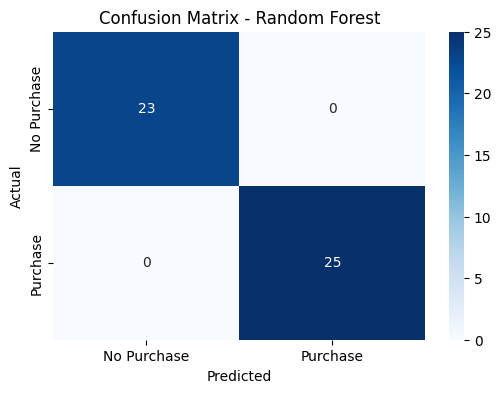

In [ ]:
# Predict with the best model
y_pred_best = best_model.predict(X_test)

# Print classification report
print("Classification Report for Best Model:")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()


# **6. Visualization**

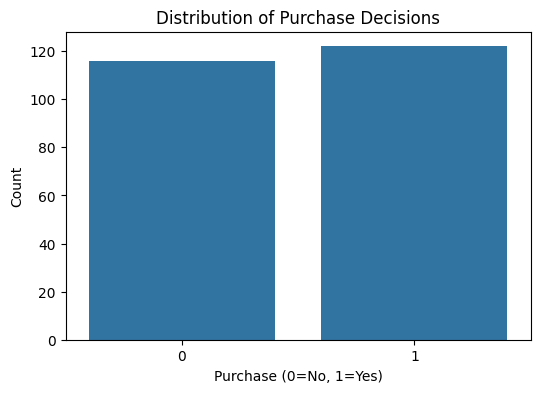

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['purchase'])
plt.title('Distribution of Purchase Decisions')
plt.xlabel('Purchase (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()


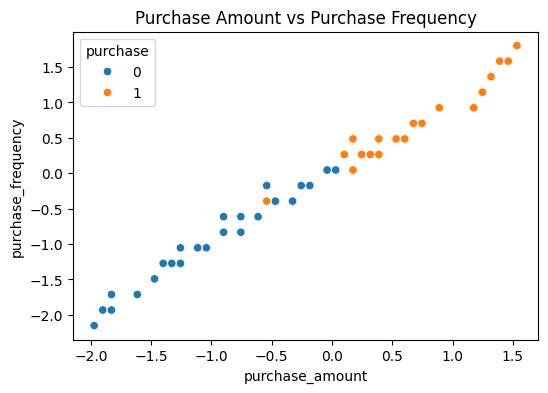

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['purchase_amount'], y=df['purchase_frequency'], hue=df['purchase'])
plt.title('Purchase Amount vs Purchase Frequency')
plt.show()


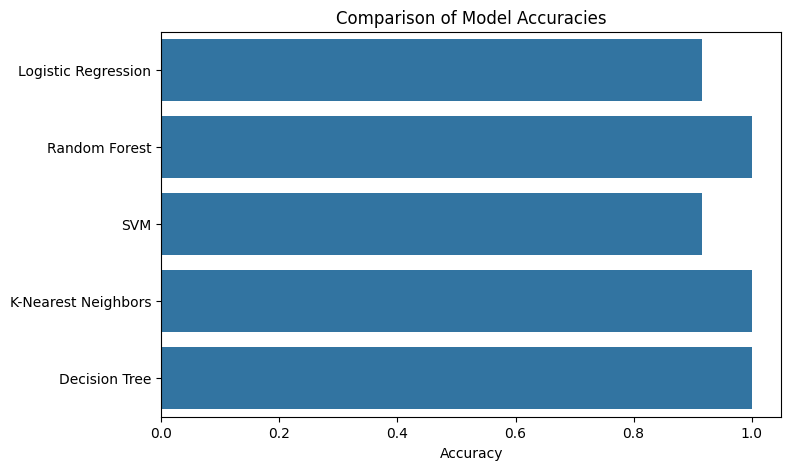

In [ ]:
model_names = list(results.keys())
accuracies = [results[name]['Accuracy'] for name in model_names]

plt.figure(figsize=(8,5))
sns.barplot(x=accuracies, y=model_names)
plt.xlabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()
